<a href="https://colab.research.google.com/github/ola-sumbo/Hamoye-Internship/blob/master/Zindi_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import pandas_profiling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.utils import shuffle
import time

In [ ]:
from google.colab import files
uploaded = files.upload()

In [92]:
import io
test_df= pd.read_csv('Test.csv')
test_df.head()
test_df = test_df.fillna(method='ffill')

In [ ]:
from google.colab import files
uploaded = files.upload()

In [93]:
train_df= pd.read_csv('Train.csv')
train_df.head()
train_df= train_df.fillna(method='ffill')

In [94]:
dataset = pd.concat([train_df, test_df], sort=True)
dataset.head() 

,Applicant_ID,default_status,form_field1,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field2,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field3,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field4,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field5,form_field50,form_field6,form_field7,form_field8,form_field9
0,Apcnt_1000000,no,3436.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,0.28505,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,1.6560,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.000,0.044335,0.0,10689720.0,252072.0,4272776.0
1,Apcnt_1000004,no,3456.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,0.67400,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,0.2342,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,0.0,NaN,NaN,0.314281,8.08,0.183584,0.0,0.0,charge,349.805730,1.620483,0.000,0.322436,0.0,898979.0,497531.0,9073814.0
2,Apcnt_1000008,yes,3276.0,1079864.0,244292.0,3982971.0,0.0,16576457,22452691.0,1.0,1.0,1.0,0.0,0.53845,0.0,109.230,11385.24,14584.29,86.685,1597.5,4746.0,3164.0,60.0,15696.0,3.1510,5780.0,14508.0,70.0,0.6666,0.0,0.0,12.0,0.0,6.0,0.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,349.805730,1.513370,6.282,0.011640,0.0,956940.0,497531.0,192944.0
3,Apcnt_1000012,no,3372.0,3621979.0,244292.0,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,0.17005,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,0.5050,5780.0,14508.0,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,0.0,149.6805,NaN,0.488884,2.02,0.685168,0.0,0.0,charge,89.940100,0.664452,0.000,0.082729,192166.0,3044703.0,385499.0,3986472.0
4,Apcnt_1000016,no,3370.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,0.77270,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,1.1010,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.000,0.045630,1556.0,214728.0,214728.0,1284089.0


In [95]:
# dataset.isnull().any()
dataset.dtypes

Applicant_ID       object
default_status     object
form_field1       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field2       float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field3       float64
form_field30      float64
form_field31      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38      float64
form_field39      float64
form_field4       float64
form_field40      float64
form_field41      float64
form_field42

        form_field1  form_field10  ...   form_field8   form_field9
count  80000.000000  8.000000e+04  ...  8.000000e+04  8.000000e+04
mean    3491.352500  1.185769e+07  ...  2.574596e+06  1.310295e+07
std      188.999511  2.611433e+07  ...  3.886000e+06  2.115927e+07
min     2986.000000  0.000000e+00  ...  0.000000e+00  0.000000e+00
25%     3358.000000  4.410288e+05  ...  1.820520e+05  1.339230e+06
50%     3484.000000  3.686553e+06  ...  9.203740e+05  5.396986e+06
75%     3620.000000  1.322882e+07  ...  3.623535e+06  1.669199e+07
max     3900.000000  2.191361e+09  ...  1.135141e+08  1.443921e+09

[8 rows x 49 columns]


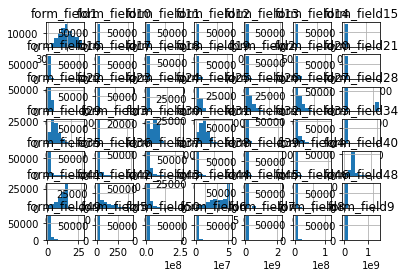

In [96]:
# summarize each variable
from matplotlib import pyplot
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

**Data Pre processing**

In [ ]:
#list(dataset.columns.values)

In [97]:
CategoricalColumns = ['form_field47', 'default_status']

type(dataset)

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset['form_field47_new'] = lb_make.fit_transform(dataset['form_field47'])
dataset = dataset.drop('form_field47', axis=1 )
dataset.head()

,Applicant_ID,default_status,form_field1,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field2,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field3,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field4,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field5,form_field50,form_field6,form_field7,form_field8,form_field9,form_field47_new
0,Apcnt_1000000,no,3436.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,0.28505,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,1.6560,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,NaN,1.129518,0.000,0.044335,0.0,10689720.0,252072.0,4272776.0,0
1,Apcnt_1000004,no,3456.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,0.67400,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,0.2342,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,0.0,NaN,NaN,0.314281,8.08,0.183584,0.0,0.0,349.805730,1.620483,0.000,0.322436,0.0,898979.0,497531.0,9073814.0,0
2,Apcnt_1000008,yes,3276.0,1079864.0,244292.0,3982971.0,0.0,16576457,22452691.0,1.0,1.0,1.0,0.0,0.53845,0.0,109.230,11385.24,14584.29,86.685,1597.5,4746.0,3164.0,60.0,15696.0,3.1510,5780.0,14508.0,70.0,0.6666,0.0,0.0,12.0,0.0,6.0,0.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,349.805730,1.513370,6.282,0.011640,0.0,956940.0,497531.0,192944.0,0
3,Apcnt_1000012,no,3372.0,3621979.0,244292.0,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,0.17005,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,0.5050,5780.0,14508.0,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,0.0,149.6805,NaN,0.488884,2.02,0.685168,0.0,0.0,89.940100,0.664452,0.000,0.082729,192166.0,3044703.0,385499.0,3986472.0,0
4,Apcnt_1000016,no,3370.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,0.77270,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,1.1010,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,97.887502,1.427891,0.000,0.045630,1556.0,214728.0,214728.0,1284089.0,0


In [119]:
cus_pred_y = dataset[['default_status']]
cus_pred_x = dataset.drop(['default_status','Applicant_ID'], axis= 1)
dataset.Applicant_ID.unique()
dataset.info

<bound method DataFrame.info of         Applicant_ID default_status  ...  form_field9  form_field47_new
0      Apcnt_1000000             no  ...    4272776.0                 0
1      Apcnt_1000004             no  ...    9073814.0                 0
2      Apcnt_1000008            yes  ...     192944.0                 0
3      Apcnt_1000012             no  ...    3986472.0                 0
4      Apcnt_1000016             no  ...    1284089.0                 0
...              ...            ...  ...          ...               ...
23995   Apcnt_999940            NaN  ...    2717943.0                 0
23996   Apcnt_999956            NaN  ...   89718571.0                 0
23997   Apcnt_999976            NaN  ...   89718571.0                 0
23998   Apcnt_999984            NaN  ...     393668.0                 0
23999   Apcnt_999992            NaN  ...   18885950.0                 0

[80000 rows x 52 columns]>

In [120]:
from pandas import DataFrame
cus_pred_y = DataFrame (cus_pred_y,columns=['default_status'])
cus_pred_y = cus_pred_y.dropna()

In [121]:
# Get one hot encoding of columns 'default_status'
# cus_pred_y = pd.get_dummies(cus_pred_y['default_status'])

cus_pd_y = LabelEncoder().fit_transform(cus_pred_y.astype('str'))
# Join the encoded df
cus_pd_y

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, ..., 0, 0, 0])

Text(0.5, 1.0, 'Correlation matrix')

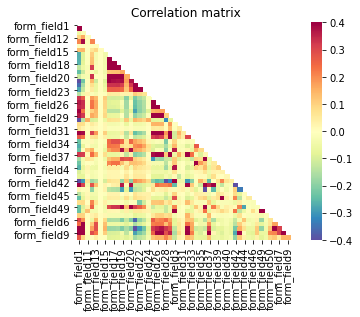

In [122]:
dataset.corr().round(3)

corrs = cus_pred_x.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

**Check the features of Importance**

In [102]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [123]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
cus_pred_x, cus_pd_y = make_classification(n_samples=80000, n_features=53, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(cus_pred_x.shape, cus_pd_y.shape)

(80000, 53) (80000,)


Feature: 0, Score: -0.00041
Feature: 1, Score: 601194329524.04504
Feature: 2, Score: -0.00182
Feature: 3, Score: 0.00132
Feature: 4, Score: 0.00014
Feature: 5, Score: 0.00119
Feature: 6, Score: -205622492739.75644
Feature: 7, Score: 0.00110
Feature: 8, Score: -0.00031
Feature: 9, Score: 0.00044
Feature: 10, Score: -0.00063
Feature: 11, Score: 0.00149
Feature: 12, Score: 0.00031
Feature: 13, Score: -0.00065
Feature: 14, Score: 0.00089
Feature: 15, Score: 389027942932.19958
Feature: 16, Score: 0.00043
Feature: 17, Score: 81171388651.65868
Feature: 18, Score: -0.00010
Feature: 19, Score: -0.00056
Feature: 20, Score: -0.00006
Feature: 21, Score: -0.00019
Feature: 22, Score: 0.00232
Feature: 23, Score: -0.00060
Feature: 24, Score: 0.00150
Feature: 25, Score: 76975708165.48680
Feature: 26, Score: -0.00172
Feature: 27, Score: -0.00066
Feature: 28, Score: -128029592788.84778
Feature: 29, Score: -0.00109
Feature: 30, Score: -237888488771.07663
Feature: 31, Score: 0.00198
Feature: 32, Score: -0.

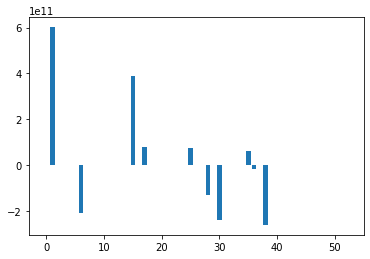

In [124]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(cus_pred_x, cus_pd_y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([cus_pred_x for cus_pred_x in range(len(importance))], importance)
pyplot.show()  # suggests 42 features are important for predictions

**Last Processing Step: Normalizing Features**

In [125]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
features = trans.fit_transform(cus_pred_x)

In [126]:
labels = cus_pd_y
features = cus_pred_x
labels = np.reshape(labels, (-1, 1))

**Train a Logistic Regression Model using Scikit-Learn**

In [127]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size =0.3, random_state=42, stratify = labels)
print('X_train.shape', X_train.shape, 'y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape, 'y_test.shape', y_test.shape)

X_train.shape (56000, 53) y_train.shape (56000, 1)
X_test.shape (24000, 53) y_test.shape (24000, 1)


In [108]:
from sklearn.linear_model import LogisticRegression
sklearn_lr = LogisticRegression()
print(sklearn_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [109]:
# Train the logistic regression model using scikit-learn 
to = time.time()
sklearn_lr.fit(X_train, y_train)
sklearn_pred = sklearn_lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print(sklearn_pred,len(sklearn_pred))
print (accuracy_score(y_test, sklearn_pred))
print(mean_squared_error(y_test, sklearn_pred))


[1 1 1 ... 1 0 1] 24000
0.8310416666666667
0.16895833333333332


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Feature of Importance Use for prediction**

In [110]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define the dataset
labels, target = make_classification(n_samples=80000, n_features=53, n_informative=5, n_redundant=5, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(labels, target, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 82.70


**Train with Random Forest Model Using Scikit Learn**

In [128]:
from sklearn.ensemble import RandomForestClassifier
sklearn_rf = RandomForestClassifier(n_estimators=160, n_jobs=160, random_state=0)
# training random forest classifier using scikit learn
sklearn_rf.fit(X_train, y_train)
rf_pred = sklearn_rf.predict(X_test)

from sklearn.metrics import mean_squared_error
print(rf_pred,len(rf_pred))
print (accuracy_score(y_test, rf_pred))
print(mean_squared_error(y_test, rf_pred))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[1 1 1 ... 1 0 0] 24000
0.933875
0.066125


In [129]:
Applicant_id = dataset['Applicant_ID']
X_tra, X_te, y_tra, y_te = train_test_split(Applicant_id, target, test_size=0.33, random_state=1)
Applicant_id = pd.DataFrame (X_te)
predict = pd.DataFrame(rf_pred)
prediction = Applicant_id.join(predict)
prediction.rename(columns= {0 : 'default_status_'}, inplace=True)
prediction

,Applicant_ID,default_status_
0,Apcnt_1000032,1.0
1,Apcnt_1000004,1.0
3,Apcnt_1000012,0.0
4,Apcnt_1000080,0.0
5,Apcnt_1000084,1.0
...,...,...
55983,Apcnt_999908,NaN
55986,Apcnt_999924,NaN
55989,Apcnt_999936,NaN
55992,Apcnt_999952,NaN


In [130]:
prediction = prediction.to_csv('prediction.csv')

**Using XGboost Classifier**

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.31697
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.17558
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.04171
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.04154
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.04750
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.16086
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.05932
Feature: 31, Score: 0.00079
Feature: 32, Score: 0.00108
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.07506
Fe

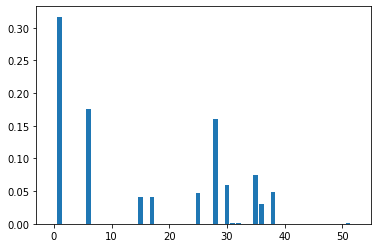

In [111]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
labels, target = make_classification(n_samples=80000, n_features=53, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier()
# fit the model
model.fit(labels, target)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([labels for labels in range(len(importance))], importance)
pyplot.show()

In [112]:
# define the dataset
labels, target = make_classification(n_samples=80000, n_features=53, n_informative=5, n_redundant=5, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(labels, target, test_size=0.33, random_state=1)
# fit the model
# define the model
model = XGBClassifier()
# fit the model
model.fit(labels, target)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.70


In [113]:
import pandas
Applicant_id = dataset['Applicant_ID']
X_train, X_test, y_train, y_test = train_test_split(Applicant_id, target, test_size=0.33, random_state=1)
Applicant_id = pd.DataFrame (X_test)
prediction = pd.DataFrame(yhat)
predictions = Applicant_id.join(prediction)
predictions.rename(columns= {0 : 'default_status_pred'}, inplace=True)
predictions

,Applicant_ID,default_status_pred
0,Apcnt_1000032,1.0
1,Apcnt_1000004,0.0
3,Apcnt_1000012,0.0
4,Apcnt_1000080,0.0
5,Apcnt_1000084,0.0
...,...,...
55983,Apcnt_999908,NaN
55986,Apcnt_999924,NaN
55989,Apcnt_999936,NaN
55992,Apcnt_999952,NaN


In [ ]:
prediction = predictions.to_csv('predictions.csv')